In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import sklearn
import random

random.seed(12345)

In [2]:
Xtrain = np.loadtxt('Xtrain.csv')
Ytrain = np.loadtxt('Ytrain.csv')
Xtest = np.loadtxt('Xtest.csv')

In [3]:
print('There are', Xtrain.shape[0], 'training examples')
print('There are', Xtest.shape[0], 'test examples')

There are 3000 training examples
There are 3000 test examples


Text(0.5, 1.0, 'Class +1 Example 10')

<Figure size 432x288 with 0 Axes>

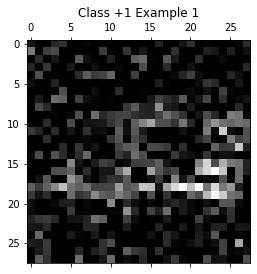

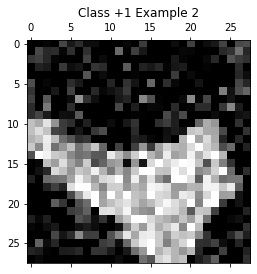

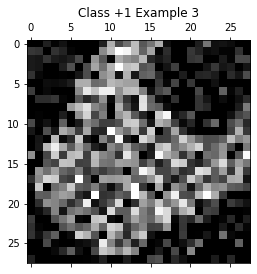

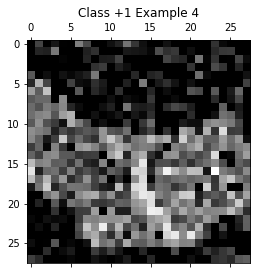

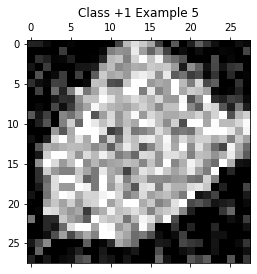

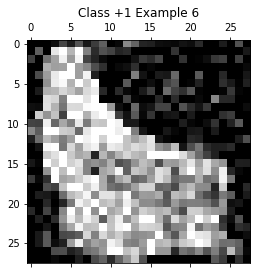

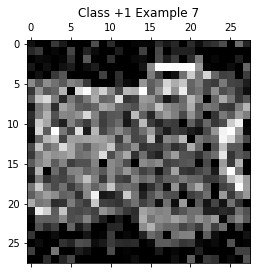

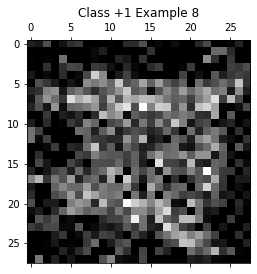

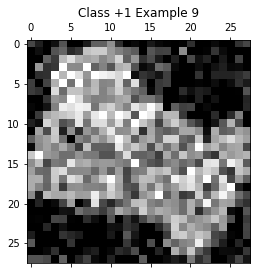

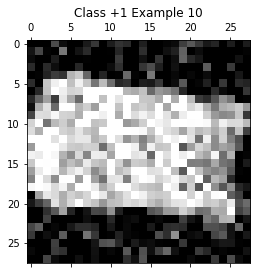

In [4]:
idx_class_neg1 = ( Ytrain == -1) # index for -1 class
idx_class_pos1 = ( Ytrain == +1) # index for +1 class

Xtrain_pos1 = Xtrain[idx_class_pos1, ] #all +1 class training examples
Xtrain_neg1 = Xtrain[idx_class_neg1, ] #all -1 class training examples
Ytrain_pos1 = Ytrain[idx_class_pos1, ] #all +1 class training labels
Ytrain_neg1 = Ytrain[idx_class_neg1, ] #all -1 class training labels

idx_pos1 = list(range(len(Ytrain_pos1)))
idx_neg1 = list(range(len(Ytrain_neg1)))
random.shuffle(idx_pos1) # Just shuffle the data for positive classes
random.shuffle(idx_neg1) # Just shuffle the data for positive classes
Xtrain_pos1_random, Ytrain_pos1_random = Xtrain_pos1[idx_pos1,:], Ytrain_pos1[idx_pos1] #randomly shuffled positive class
                                                                                        #training examples
Xtrain_neg1_random, Ytrain_neg1_random = Xtrain_neg1[idx_neg1,:], Ytrain_neg1[idx_neg1] #randomly shuffled negative class
                                                                                        #training examples
plt.gray();plt.matshow(Xtrain_pos1_random[0].reshape((28, 28)));plt.title('Class +1 Example 1')
plt.gray();plt.matshow(Xtrain_pos1_random[1].reshape((28, 28)));plt.title('Class +1 Example 2') 
plt.gray();plt.matshow(Xtrain_pos1_random[2].reshape((28, 28)));plt.title('Class +1 Example 3') 
plt.gray();plt.matshow(Xtrain_pos1_random[3].reshape((28, 28)));plt.title('Class +1 Example 4') 
plt.gray();plt.matshow(Xtrain_pos1_random[4].reshape((28, 28)));plt.title('Class +1 Example 5')  
plt.gray();plt.matshow(Xtrain_pos1_random[5].reshape((28, 28)));plt.title('Class +1 Example 6') 
plt.gray();plt.matshow(Xtrain_pos1_random[6].reshape((28, 28)));plt.title('Class +1 Example 7') 
plt.gray();plt.matshow(Xtrain_pos1_random[7].reshape((28, 28)));plt.title('Class +1 Example 8')  
plt.gray();plt.matshow(Xtrain_pos1_random[8].reshape((28, 28)));plt.title('Class +1 Example 9') 
plt.gray();plt.matshow(Xtrain_pos1_random[9].reshape((28, 28)));plt.title('Class +1 Example 10') 

Text(0.5, 1.0, 'Class -1 Example 10')

<Figure size 432x288 with 0 Axes>

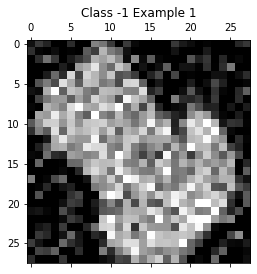

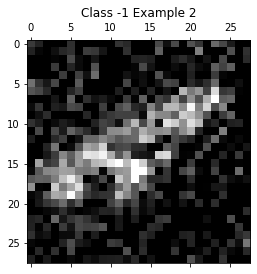

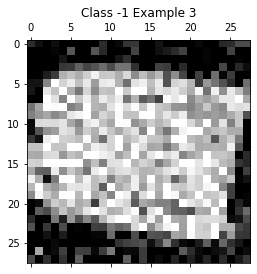

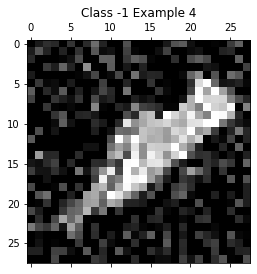

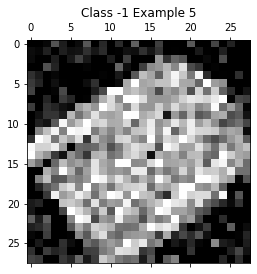

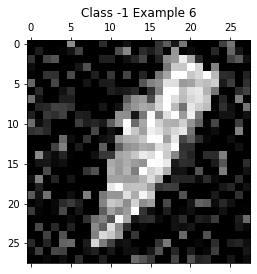

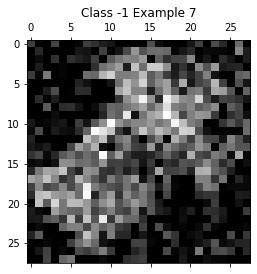

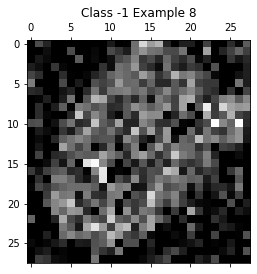

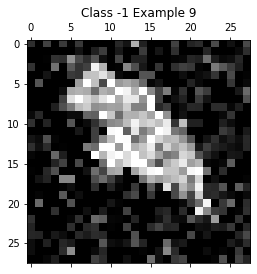

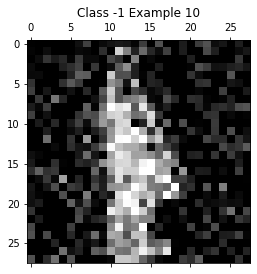

In [5]:
plt.gray();plt.matshow(Xtrain_neg1_random[0].reshape((28, 28)));plt.title('Class -1 Example 1')
plt.gray();plt.matshow(Xtrain_neg1_random[1].reshape((28, 28)));plt.title('Class -1 Example 2') 
plt.gray();plt.matshow(Xtrain_neg1_random[2].reshape((28, 28)));plt.title('Class -1 Example 3') 
plt.gray();plt.matshow(Xtrain_neg1_random[3].reshape((28, 28)));plt.title('Class -1 Example 4') 
plt.gray();plt.matshow(Xtrain_neg1_random[4].reshape((28, 28)));plt.title('Class -1 Example 5')  
plt.gray();plt.matshow(Xtrain_neg1_random[5].reshape((28, 28)));plt.title('Class -1 Example 6') 
plt.gray();plt.matshow(Xtrain_neg1_random[6].reshape((28, 28)));plt.title('Class -1 Example 7') 
plt.gray();plt.matshow(Xtrain_neg1_random[7].reshape((28, 28)));plt.title('Class -1 Example 8')  
plt.gray();plt.matshow(Xtrain_neg1_random[8].reshape((28, 28)));plt.title('Class -1 Example 9') 
plt.gray();plt.matshow(Xtrain_neg1_random[9].reshape((28, 28)));plt.title('Class -1 Example 10')

In [6]:
print('There are', len(Ytrain_pos1), 'positive training examples.')
print('There are', len(Ytrain_neg1), 'negative training examples.')

There are 2118 positive training examples.
There are 882 negative training examples.


Section 2: KNN

In [7]:
def accuracy(Ytest,Ypred): #defining accuracy metric
    # to do: calculate accuracy
    # input:
    # Ytest: nx1 vector of labels (true)
    # Ypred: nx1 vector of labels (predicted)
    if len(Ytest) != len(Ypred):
        warnings.warn("Vectors not of same length. Unable to calculate accuracy.")
        return
    else:
        t = (sum(Ypred == Ytest)) / len(Ytest)
    return t #dummy return

In [12]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import roc_auc_score, average_precision_score

# acc_list = []
# roc_list = []
# pr_list = []

# skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
# #skf.get_n_splits(Xtrain, Ytrain) DONT THINK I NEED BUT DOUBLE CHECK
# fold = 1

# for train_index, cv_index in skf.split(Xtrain, Ytrain):
#     Xtrain_cv, Xtest_cv = Xtrain[train_index], Xtrain[cv_index]
#     ytrain_cv, ytest_cv = Ytrain[train_index], Ytrain[cv_index]
#     sknn = KNeighborsClassifier(n_neighbors=1) #1 neighbour
#     sknn.fit(Xtrain_cv,ytrain_cv)
#     cv_pred = sknn.predict(Xtest_cv)
#     acc = accuracy(ytest_cv, cv_pred)
#     roc = roc_auc_score(ytest_cv, cv_pred)
#     pr = average_precision_score(ytest_cv, cv_pred)
#     print('Fold', fold, 'accuracy score is:', np.round(acc,4))
#     print('AUC ROC score is:', np.round(roc,2))
#     print('AUC PR score is:', np.round(pr,2))
#     print('')
#     roc_list.append(roc)
#     pr_list.append(pr)
#     acc_list.append(acc)
#     fold +=1
    
# print('The average scores are: ')
# print('Accuracy:', round(np.mean(acc_list),4))
# print('AUC ROC:', round(np.mean(roc_list),4))
# print('AUC PR:', round(np.mean(pr_list),4))
        
# noscalescores = [np.mean(acc_list), np.mean(roc_list), np.mean(pr_list)]

Fold 1 accuracy score is: 0.7583
AUC ROC score is: 0.73
AUC PR score is: 0.82

Fold 2 accuracy score is: 0.7567
AUC ROC score is: 0.73
AUC PR score is: 0.82

Fold 3 accuracy score is: 0.7583
AUC ROC score is: 0.72
AUC PR score is: 0.82

Fold 4 accuracy score is: 0.7533
AUC ROC score is: 0.72
AUC PR score is: 0.82

Fold 5 accuracy score is: 0.7383
AUC ROC score is: 0.71
AUC PR score is: 0.81

The average scores are: 
Accuracy: 0.753
AUC ROC: 0.7242
AUC PR: 0.8176


Looking at 3 different scalers: Standardisation, Max-Min scaler and Max Abs scaler.
First, Standardisation

In [13]:
# from sklearn import preprocessing
# fold = 1
# roc_list_stdscaler = []
# pr_list_stdscaler = []
# acc_list_stdscaler = []

# skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)

# for train_index, cv_index in skf.split(Xtrain, Ytrain):
#     Xtrain_cv, Xtest_cv = Xtrain[train_index], Xtrain[cv_index]
#     ytrain_cv, ytest_cv = Ytrain[train_index], Ytrain[cv_index]
    
#     std_scale = preprocessing.StandardScaler().fit(Xtrain_cv)
#     Xtrain_cv_std_scale = std_scale.transform(Xtrain_cv)
#     Xtest_cv_std_scale = std_scale.transform(Xtest_cv)
    
#     sknn = KNeighborsClassifier(n_neighbors=1) #1 neighbour
#     sknn.fit(Xtrain_cv_std_scale,ytrain_cv)
#     cv_pred = sknn.predict(Xtest_cv_std_scale)
#     acc = accuracy(ytest_cv, cv_pred)
#     roc = roc_auc_score(ytest_cv, cv_pred)
#     pr = average_precision_score(ytest_cv, cv_pred)
#     print('Fold', fold, 'accuracy score is:', np.round(acc,4))
#     print('AUC ROC score is:', np.round(roc,4))
#     print('AUC PR score is:', np.round(pr,4))
#     print('')
#     roc_list_stdscaler.append(roc)
#     pr_list_stdscaler.append(pr)
#     acc_list_stdscaler.append(acc)
#     fold +=1
    
# print('The average scores are: ')
# print('Accuracy:', round(np.mean(acc_list_stdscaler),4))
# print('AUC ROC:', round(np.mean(roc_list_stdscaler),4))
# print('AUC PR:', round(np.mean(pr_list_stdscaler),4))

# stdscalerscores = [np.mean(acc_list_stdscaler), np.mean(roc_list_stdscaler), np.mean(pr_list_stdscaler)]

Fold 1 accuracy score is: 0.765
AUC ROC score is: 0.7324
AUC PR score is: 0.8225

Fold 2 accuracy score is: 0.7633
AUC ROC score is: 0.7395
AUC PR score is: 0.8272

Fold 3 accuracy score is: 0.7333
AUC ROC score is: 0.6917
AUC PR score is: 0.7993

Fold 4 accuracy score is: 0.76
AUC ROC score is: 0.7279
AUC PR score is: 0.8188

Fold 5 accuracy score is: 0.7283
AUC ROC score is: 0.6989
AUC PR score is: 0.8026

The average scores are: 
Accuracy: 0.75
AUC ROC: 0.7181
AUC PR: 0.8141


Max-Min:

In [15]:
# fold = 1
# roc_list_minmax = []
# pr_list_minmax = []
# acc_list_minmax = []
# skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)

# for train_index, cv_index in skf.split(Xtrain, Ytrain):
#     Xtrain_cv, Xtest_cv = Xtrain[train_index], Xtrain[cv_index]
#     ytrain_cv, ytest_cv = Ytrain[train_index], Ytrain[cv_index]
    
#     min_max_scale = preprocessing.MinMaxScaler().fit(Xtrain_cv)
#     Xtrain_cv_min_max_scale = min_max_scale.transform(Xtrain_cv)
#     Xtest_cv_min_max_scale = min_max_scale.transform(Xtest_cv)
    
#     sknn = KNeighborsClassifier(n_neighbors=1) #1 neighbour
#     sknn.fit(Xtrain_cv_min_max_scale,ytrain_cv)
#     cv_pred = sknn.predict(Xtest_cv_min_max_scale)
#     acc = accuracy(ytest_cv, cv_pred)
#     roc = roc_auc_score(ytest_cv, cv_pred)
#     pr = average_precision_score(ytest_cv, cv_pred)
#     print('Fold', fold, 'accuracy score is:', np.round(acc,4))
#     print('AUC ROC score is:', np.round(roc,4))
#     print('AUC PR score is:', np.round(pr,4))
#     print('')
#     roc_list_minmax.append(roc)
#     pr_list_minmax.append(pr)
#     acc_list_minmax.append(acc)
#     fold +=1
    
# print('The average scores are: ')
# print('Accuracy:', round(np.mean(acc_list_minmax),4))
# print('AUC ROC:', round(np.mean(roc_list_minmax),4))
# print('AUC PR:', round(np.mean(pr_list_minmax),4))

# maxminscores = [np.mean(acc_list_minmax), np.mean(roc_list_minmax), np.mean(pr_list_minmax)]

Fold 1 accuracy score is: 0.7617
AUC ROC score is: 0.7367
AUC PR score is: 0.8255

Fold 2 accuracy score is: 0.7533
AUC ROC score is: 0.7274
AUC PR score is: 0.8201

Fold 3 accuracy score is: 0.76
AUC ROC score is: 0.7222
AUC PR score is: 0.8163

Fold 4 accuracy score is: 0.755
AUC ROC score is: 0.726
AUC PR score is: 0.8179

Fold 5 accuracy score is: 0.7367
AUC ROC score is: 0.7065
AUC PR score is: 0.8068

The average scores are: 
Accuracy: 0.7533
AUC ROC: 0.7238
AUC PR: 0.8173


Max Abs Scaler

In [16]:
# fold = 1
# roc_list_maxabs = []
# pr_list_maxabs = []
# acc_list_maxabs = []
# skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)

# for train_index, cv_index in skf.split(Xtrain, Ytrain):
#     Xtrain_cv, Xtest_cv = Xtrain[train_index], Xtrain[cv_index]
#     ytrain_cv, ytest_cv = Ytrain[train_index], Ytrain[cv_index]
    
#     max_abs_scale = preprocessing.MaxAbsScaler().fit(Xtrain_cv)
#     Xtrain_cv_max_abs_scale = max_abs_scale.transform(Xtrain_cv)
#     Xtest_cv_max_abs_scale = max_abs_scale.transform(Xtest_cv)
    
#     sknn = KNeighborsClassifier(n_neighbors=1) #1 neighbour
#     sknn.fit(Xtrain_cv_max_abs_scale,ytrain_cv)
#     cv_pred = sknn.predict(Xtest_cv_max_abs_scale)
#     acc = accuracy(ytest_cv, cv_pred)
#     roc = roc_auc_score(ytest_cv, cv_pred)
#     pr = average_precision_score(ytest_cv, cv_pred)
#     print('Fold', fold, 'accuracy score is:', np.round(acc,4))
#     print('AUC ROC score is:', np.round(roc,4))
#     print('AUC PR score is:', np.round(pr,4))
#     print('')
#     roc_list_maxabs.append(roc)
#     pr_list_maxabs.append(pr)
#     acc_list_maxabs.append(acc)
#     fold +=1
    
# print('The average scores are: ')
# print('Accuracy:', round(np.mean(acc_list_maxabs),4))
# print('AUC ROC:', round(np.mean(roc_list_maxabs),4))
# print('AUC PR:', round(np.mean(pr_list_maxabs),4))

# maxabsscores = [np.mean(acc_list_maxabs), np.mean(roc_list_maxabs), np.mean(pr_list_maxabs)]

Fold 1 accuracy score is: 0.7617
AUC ROC score is: 0.7367
AUC PR score is: 0.8255

Fold 2 accuracy score is: 0.7533
AUC ROC score is: 0.7274
AUC PR score is: 0.8201

Fold 3 accuracy score is: 0.76
AUC ROC score is: 0.7222
AUC PR score is: 0.8163

Fold 4 accuracy score is: 0.755
AUC ROC score is: 0.726
AUC PR score is: 0.8179

Fold 5 accuracy score is: 0.7367
AUC ROC score is: 0.7065
AUC PR score is: 0.8068

The average scores are: 
Accuracy: 0.7533
AUC ROC: 0.7238
AUC PR: 0.8173


<!-- Trying log transformation -->

In [30]:
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.preprocessing import PolynomialFeatures


# fold = 1
# roc_list_transform_log= []
# pr_list_transform_log = []
# acc_list_transform_log = []
# skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)

# for train_index, cv_index in skf.split(Xtrain, Ytrain):
#     Xtrain_cv, Xtest_cv = Xtrain[train_index], Xtrain[cv_index]
#     ytrain_cv, ytest_cv = Ytrain[train_index], Ytrain[cv_index]
    
#     transformer = PolynomialFeatures(28*28)
#     Xtrain_cv_transform_log = transformer.fit_transform(Xtrain_cv)
#     Xtest_cv_transform_log  = transformer.fit_transform(Xtest_cv)
    
#     sknn = KNeighborsClassifier(n_neighbors=1) #1 neighbour
#     sknn.fit(Xtrain_cv_transform_log,ytrain_cv)
#     cv_pred = sknn.predict(Xtest_cv_transform_log)
#     acc = accuracy(ytest_cv, cv_pred)
#     roc = roc_auc_score(ytest_cv, cv_pred)
#     pr = average_precision_score(ytest_cv, cv_pred)
#     print('Fold', fold, 'accuracy score is:', np.round(acc,4))
#     print('AUC ROC score is:', np.round(roc,4))
#     print('AUC PR score is:', np.round(pr,4))
#     print('')
#     roc_list_transform_log.append(roc)
#     pr_list_transform_log.append(pr)
#     acc_list_transform_log.append(acc)
#     fold +=1
    
# print('The average scores are: ')
# print('Accuracy:', round(np.mean(acc_list_transform_log),4))
# print('AUC ROC:', round(np.mean(roc_list_transform_log),4))
# print('AUC PR:', round(np.mean(pr_list_transform_log),4))

# transform_logscores = [np.mean(acc_list_transform_log), np.mean(roc_list_transform_log), np.mean(pr_list_transform_log)]

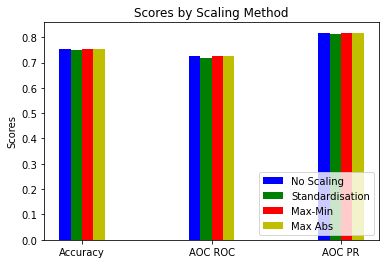

In [18]:
# import matplotlib.pyplot as plt


# x = np.arange(3) 

# fig, ax = plt.subplots()
# w = 0.35
# ax.bar(x-w/2, noscalescores, width=w/4, color='b', align='center', label='No Scaling')
# ax.bar(x-w/4, stdscalerscores, width=w/4, color='g', align='center', label='Standardisation')
# ax.bar(x, maxminscores, width=w/4, color='r', align='center', label='Max-Min')
# ax.bar(x+w/4, maxabsscores, width=w/4, color='y', align='center', label='Max Abs')

# #ax.autoscale(tight=True)
# ax.set_ylabel('Scores')
# ax.set_title('Scores by Scaling Method')
# ax.legend(loc = 'lower right')
# ax.set_xticks(x-w/8)
# ax.set_xticklabels( ('Accuracy', 'AOC ROC', 'AOC PR') )

# plt.show()

Scaling does not seem to impact the scores so we will not proceed with it for the KNN. Fitting the hyperparameter.

In [24]:
# k_max = 10
# k_list = list(range(1, 1+k_max))

# k_acc_list = []
# k_roc_list = []
# k_pr_list = []

# for k in k_list:
#     skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
#     roc_list = []
#     pr_list = []
#     acc_list = []

#     for train_index, cv_index in skf.split(Xtrain, Ytrain):
#         Xtrain_cv, Xtest_cv = Xtrain[train_index], Xtrain[cv_index]
#         ytrain_cv, ytest_cv = Ytrain[train_index], Ytrain[cv_index]
#         sknn = KNeighborsClassifier(n_neighbors=k) #kth neighbour
#         sknn.fit(Xtrain_cv,ytrain_cv)
#         cv_pred = sknn.predict(Xtest_cv)
#         acc = accuracy(ytest_cv, cv_pred)
#         roc = roc_auc_score(ytest_cv, cv_pred)
#         pr = average_precision_score(ytest_cv, cv_pred)
#         roc_list.append(roc)
#         pr_list.append(pr)
#         acc_list.append(acc)

#     k_acc_list.append(np.mean(acc_list))
#     k_roc_list.append(np.mean(roc_list))
#     k_pr_list.append(np.mean(pr_list))

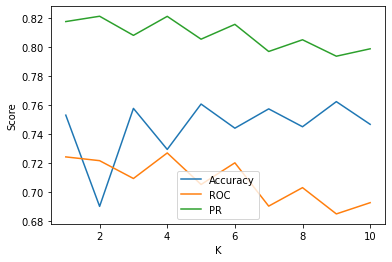

In [25]:
# plt.plot(k_list, k_acc_list, label = "Accuracy")
# plt.plot(k_list, k_roc_list, label = "ROC")
# plt.plot(k_list, k_pr_list, label = "PR")
# plt.xlabel('K')
# plt.ylabel('Score')
# plt.legend()
# plt.show()

Trying Perceptron

In [ ]:

from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=42)
clf.fit(X, y)
Perceptron()
clf.score(X, y)
0.939...

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, average_precision_score

#sorted(sklearn.metrics.SCORERS.keys()) ones I can use in cross_val_score

sknn = KNeighborsClassifier(n_neighbors=1)
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
roc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') #auc pr I think but can change

print('For untransformed data with KNN, K=1:')
print("%0.3f accuracy with a standard deviation of %0.3f" % (acc.mean(), acc.std()))
print("%0.3f ROC with a standard deviation of %0.3f" % (roc.mean(), roc.std()))
print("%0.3f PR with a standard deviation of %0.3f" % (pr.mean(), pr.std()))

For untransformed data with KNN, K=1:
0.753 accuracy with a standard deviation of 0.008
0.724 ROC with a standard deviation of 0.009
0.818 PR with a standard deviation of 0.006


In [46]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

sknn = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors=1))
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
roc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') #auc pr I think but can change

print('For standardised data with KNN, K=1:')
print("%0.3f accuracy with a standard deviation of %0.3f" % (acc.mean(), acc.std()))
print("%0.3f ROC with a standard deviation of %0.3f" % (roc.mean(), roc.std()))
print("%0.3f PR with a standard deviation of %0.3f" % (pr.mean(), pr.std()))

For standardised data with KNN, K=1:
0.750 accuracy with a standard deviation of 0.016
0.718 ROC with a standard deviation of 0.019
0.814 PR with a standard deviation of 0.011


In [47]:
sknn = make_pipeline(preprocessing.MinMaxScaler(), KNeighborsClassifier(n_neighbors=1))
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
roc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') #auc pr I think but can change

print('For Min-Max Scaled data with KNN, K=1:')
print("%0.3f accuracy with a standard deviation of %0.3f" % (acc.mean(), acc.std()))
print("%0.3f ROC with a standard deviation of %0.3f" % (roc.mean(), roc.std()))
print("%0.3f PR with a standard deviation of %0.3f" % (pr.mean(), pr.std()))

For Min-Max Scaled data with KNN, K=1:
0.753 accuracy with a standard deviation of 0.009
0.724 ROC with a standard deviation of 0.010
0.817 PR with a standard deviation of 0.006


In [48]:
sknn = make_pipeline(preprocessing.MaxAbsScaler(), KNeighborsClassifier(n_neighbors=1))
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
roc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') #auc pr I think but can change

print('For Max Abs Scaled data with KNN, K=1:')
print("%0.3f accuracy with a standard deviation of %0.3f" % (acc.mean(), acc.std()))
print("%0.3f ROC with a standard deviation of %0.3f" % (roc.mean(), roc.std()))
print("%0.3f PR with a standard deviation of %0.3f" % (pr.mean(), pr.std()))

For Max Abs Scaled data with KNN, K=1:
0.753 accuracy with a standard deviation of 0.009
0.724 ROC with a standard deviation of 0.010
0.817 PR with a standard deviation of 0.006
